<a href="https://colab.research.google.com/github/naveen-ramavath/machine-learning/blob/main/ml_lab_week_6_dt%2Cnavie_bays_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

classification problems
decision tree


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from io import StringIO
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("diabetes (1).csv")

In [4]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
dtree=DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_leaf=5,
    random_state=42
)

In [15]:
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [17]:
print("accuracy",accuracy_score(y_test,y_pred))
print("class report",classification_report(y_test,y_pred))
print("confusion matrix",confusion_matrix(y_test,y_pred))

accuracy 0.7272727272727273
class report               precision    recall  f1-score   support

           0       0.85      0.71      0.77       151
           1       0.58      0.76      0.66        80

    accuracy                           0.73       231
   macro avg       0.72      0.74      0.72       231
weighted avg       0.76      0.73      0.73       231

confusion matrix [[107  44]
 [ 19  61]]


In [19]:
feature_names=list(x.columns)
class_names=['no diabetes','diabetes']

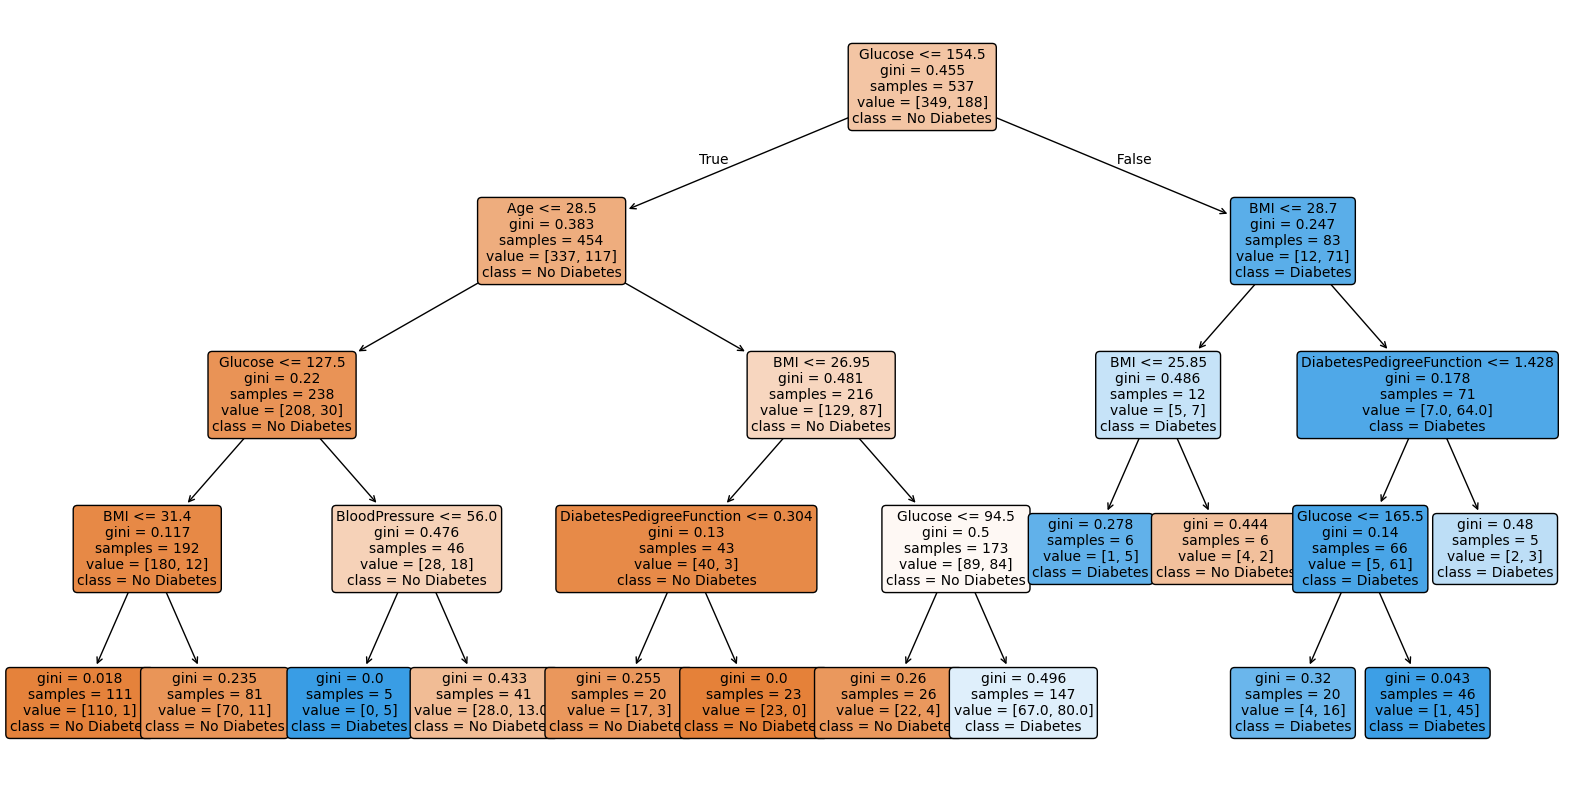

In [24]:
plt.figure(figsize=(20,10))
plot_tree(
    dtree,
    feature_names=x.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# navie bays

In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [28]:
df=pd.read_csv("loan.csv")

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [48]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

/tmp/ipython-input-3506395171.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3506395171.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [52]:
le = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = le.fit_transform(df[col])

In [53]:
X = df.drop(["Loan_ID", "Loan_Status"], axis=1)
y = df["Loan_Status"]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [59]:
y_pred = model.predict(x_test)

In [60]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7783783783783784

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.45      0.59        65
           1       0.76      0.96      0.85       120

    accuracy                           0.78       185
   macro avg       0.81      0.70      0.72       185
weighted avg       0.79      0.78      0.76       185


Confusion Matrix:
 [[ 29  36]
 [  5 115]]
